# Using the OPSIN API in Python

In [14]:
# import the (native - part of Python) Python packages needed to run this code
from IPython.display import Image, display
import requests                             # package to get data from a URL
import json                                 # package to read/write/display JSON
import re                                   # package to use regular expression (regex) searching

In [11]:
# a script to call the OPSIN API (Application Progamming Interface) and get metadata about a compound
path = "https://opsin.ch.cam.ac.uk/opsin/"  # URL path to the OPSIN API
name = "propan-2-one"                       # IUPAC name of a chemical compound, ion or element
reqdata = requests.get(path + name)         # get is a method of request data from the OPSIN server
jsondata = reqdata.json()                   # get the downloaded JSON
del jsondata['cml']                         # remove the cml element of the JSON for nicer display
print(json.dumps(jsondata, indent=4))       # print the JSON in a nice format

{
    "status": "SUCCESS",
    "message": "",
    "inchi": "InChI=1/C3H6O/c1-3(2)4/h1-2H3",
    "stdinchi": "InChI=1S/C3H6O/c1-3(2)4/h1-2H3",
    "stdinchikey": "CSCPPACGZOOCGX-UHFFFAOYSA-N",
    "smiles": "CC(C)=O"
}


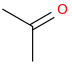

In [12]:
# print out an image of the substance
reqimg = requests.get(path + name + ".png") # request the image of the compound
display(Image(reqimg.content))              # display the image

In [22]:
# extract the formula of the substance from the standard InChI string
match = re.findall('1S/(.+?)/', jsondata['stdinchi'])   # match the formul using regex string
print(match[0])                                         # print the first (only) match

C3H6O
